##### Algoritmo multipaso 
Usando el algoritmo multipaso de orden O(h4) integre la ecuación diferencial:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [37]:
def System(y,x):
    return x + 2*y 

In [45]:
def Solution(x):
    return -x/2 -(1-np.exp(2*x))/4

In [46]:
t = np.linspace(0,4,100)
h = t[1] - t[0]
r0 = [0,0]

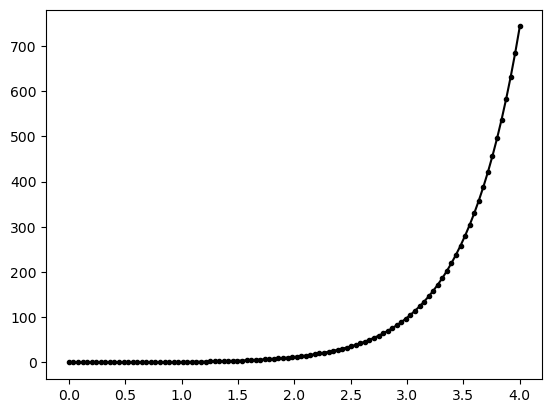

In [52]:
#sol2 = odeint(System,r0,t)

plt.plot(t,Solution(t),marker='.',color='k')


In [53]:
def IntegratorAdams(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    x = np.zeros_like(t)
    y = np.zeros_like(t)
    
    x[0] = r0[0]
    y[0] = r0[1]
    
    K11 = np.zeros(2)
    K12 = np.zeros(2)
    K13 = np.zeros(2)
    K14 = np.zeros(2)
    
    present = np.array([x[0],y[0]])
    K11 = f(present,t[0])
    
    K12 = f(np.array([y[i-1]])+0.5*h*K11,t[i-1])
    K13 = f(np.array([y[i-1]])+0.5*h*K12,t[i-1])
    K14 = f(np.array([y[i-1]])+h*K13,t[i-1])
    y[i] = y[i-1] + (h/6)*(K11[0]+2*K12[0]+2*K13[0]+K14[0])
    
    # Euler
    x[1] = x[0] + h*K11[0]
    y[1] = y[0] + h*K11[1]
    
    xc = x.copy()
    yc = y.copy()
    #Adams  Bashforth de orden 2
    for i in range(2,len(t)):
        
        present = np.array([x[i-1],y[i-1]])
        past = np.array([x[i-2],y[i-2]])
        past2 = np.array([x[i-3], y[i-3]])
        past3 = np.array ([x[i-4], y[i-4]])
        past4 = np.array ([x[i-5], y[i-5]])
        
        K11 = f(present,t[i-1])
        K12 = f(past,t[i-2])
        K13 = f(past2,t[i-3])
        K14 = f(past3,t[i-4])
        K15 = f(past4, t[i-5])
        #Bashford orden 2
        x[i] = y[i-1] + h*(1901*K11[0]-2774*K12[0]+2616*K13[0]-1274*K14[0]+251*K15[0])/720
        y[i] = y[i-1] + h*(1901*K11[1]-2774*K12[0]+2616*K13[1]-1274*K14[0]+251*K15[1])/720
        

        # Futuro
        futuro = np.array([x[i],y[i]])
        K16 = f(futuro,t[i])
        
        # #Bashford orden 3
        # x[i] = K13[0] + (1/12)*h*(23*K13[0] - 16*K11[0] + 5*K12[0])
        # y[i] = K13[1] + (1/12)*h*(23*K13[1] - 16*K11[1] + 5*K12[1])

        # futuro2 = np.array([x[i]], y[i])
        # K14 = f(futuro2,t[i+1])

        # #Bashford orden 4
        # x[i] = K14[0] + h*(55*K14[0] - 59 *K13[0] + 37*K11[0] - 9*K12[0])/24
        # y[i] = K14[1] + h*(55*K14[1] - 59 *K13[1] + 37*K11[1] - 9*K12[1])/24

        # futuro3 = np.array([x[i]], y[i])
        # K15 = f(futuro3,t[i+2])

        # #Basford orden 5
        # x[i] = K15[0] + h*(1901*K15[0] - 2774*K14[0] + 2616*K13[0] -1274*K12[0] + 251*K11[0])/720
        # y[i] = K15[1] + h*(1901*K15[1] - 2774*K14[1] + 2616*K13[1] -1274*K12[1] + 251*K11[1])/720
        
        # futuro4 = np.array([x[i]], y[i])
        # K16 = f(futuro4,t[i+3])

        xc[i] = x[i]
        yc[i] = y[i]

        xc[i] = xc[i-1] + h*(475*K16[0] + 1427*K11[0] - 798*K12[0] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440
        yc[i] = yc[i-1] + h*(475*K16[1] + 1427*K11[1] - 798*K12[1] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440

        
    return x,y,xc,yc

<>:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:79: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:79: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:79: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
<>:79: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19376\301667898.py:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  xc[i] = xc[i-1] + h*(475*K16[0] + 1427*K11[0] - 798*K12[0] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19376\301667898.py:78: 

In [54]:
sol = IntegratorAdams(System,r0,t)

plt.plot(sol[0],sol[1])

# plt.scatter(sol[:,0],sol[:,1],marker='.')

0.04040404040404041


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19376\301667898.py:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  xc[i] = xc[i-1] + h*(475*K16[0] + 1427*K11[0] - 798*K12[0] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19376\301667898.py:78: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  xc[i] = xc[i-1] + h*(475*K16[0] + 1427*K11[0] - 798*K12[0] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19376\301667898.py:79: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  yc[i] = yc[i-1] + h*(475*K16[1] + 1427*K11[1] - 798*K12[1] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1440
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_19376\301667898.py:79: SyntaxWarning: 'int' object is not subscriptable; perhaps you missed a comma?
  yc[i] = yc[i-1] + h*(475*K16[1] + 1427*K11[1] - 798*K12[1] + 482*K13[0] - 173[0]*K14 +27[0]*K15)/1

UnboundLocalError: local variable 'i' referenced before assignment

In [ ]:
plt.scatter(t,sol[:,0])
plt.scatter(t,sol2[2])

In [ ]:
plt.plot(np.abs(sol2[2]-sol[:,0]))